<a href="https://colab.research.google.com/github/Charly156/Actividad_6_regresion_lineal_multiple_y_no_lineal/blob/main/Copia_de_Actividad_6_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Modelos de regresión líneal múltiple**

In [ ]:
#Importar librerías
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [ ]:
import seaborn as sns

In [ ]:
#Leer archivo
df=pd.read_csv('BD_Socio formador (TrainingDataComplete).csv')
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [ ]:
#datos completos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [ ]:
#Selección de variables numericas
numericas=df[['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS','CURRENT_HOUSE_YRS','Risk_Flag']]
numericas.head()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,3,13,0
1,7574516,40,10,9,13,0
2,3991815,66,4,4,10,0
3,6256451,41,2,2,12,1
4,5768871,47,11,3,14,1


##**Creación de modelos**
Creación de modelo usando Risk_flag como variable dependiente.

In [ ]:
# Importa las bibliotecas necesarias
import numpy as np
from sklearn.linear_model import LinearRegression
import itertools  # Importa el módulo itertools

# Selecciona las variables numéricas
numericas = df[['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']]

# Declara la variable dependiente
Var_dep = df['Risk_Flag']

# Inicializa un diccionario para almacenar los resultados
resultados = {}

# Bucle para calcular R^2 y R para cada combinación de dos variables independientes y una variable dependiente
for combo in itertools.combinations(numericas.columns, 5):
    # Variables independientes para esta combinación
    Vars_Indep = df[list(combo)]

    # Inicializa el modelo de regresión lineal
    model = LinearRegression()

    # Ajusta el modelo con las variables declaradas
    model.fit(X=Vars_Indep, y=Var_dep)

    # Calcula el coeficiente de determinación (R^2)
    coef_deter = model.score(X=Vars_Indep, y=Var_dep)

    # Calcula el coeficiente de correlación (R)
    coef_Correl = np.sqrt(coef_deter)

    # Almacena los resultados en el diccionario
    resultados[combo] = {'R^2': coef_deter, 'R': coef_Correl}

# Imprime los resultados
for combo, valores in resultados.items():
    print(f"Variables Independientes: {combo}, Coeficiente de Determinación (R^2): {valores['R^2']}, Coeficiente de Correlación (R): {valores['R']}")


Variables Independientes: ('Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS'), Coeficiente de Determinación (R^2): 0.0017448954344837508, Coeficiente de Correlación (R): 0.04177194554343562


Creación de modelo usando Income como variable dependiente.

In [ ]:
# Importa las bibliotecas necesarias
import numpy as np
from sklearn.linear_model import LinearRegression
import itertools  # Importa el módulo itertools

# Selecciona las variables numéricas
numericas = df[['Risk_Flag','CURRENT_HOUSE_YRS','CURRENT_JOB_YRS','Experience','Age']]

# Declara la variable dependiente
Var_dep = df['Income']

# Inicializa un diccionario para almacenar los resultados
resultados = {}

# Bucle para calcular R^2 y R para cada combinación de dos variables independientes y una variable dependiente
for combo in itertools.combinations(numericas.columns, 5):
    # Variables independientes para esta combinación
    Vars_Indep = df[list(combo)]

    # Inicializa el modelo de regresión lineal
    model = LinearRegression()

    # Ajusta el modelo con las variables declaradas
    model.fit(X=Vars_Indep, y=Var_dep)

    # Calcula el coeficiente de determinación (R^2)
    coef_deter = model.score(X=Vars_Indep, y=Var_dep)

    # Calcula el coeficiente de correlación (R)
    coef_Correl = np.sqrt(coef_deter)

    # Almacena los resultados en el diccionario
    resultados[combo] = {'R^2': coef_deter, 'R': coef_Correl}

# Imprime los resultados
for combo, valores in resultados.items():
    print(f"Variables Independientes: {combo}, Coeficiente de Determinación (R^2): {valores['R^2']}, Coeficiente de Correlación (R): {valores['R']}")


Variables Independientes: ('Risk_Flag', 'CURRENT_HOUSE_YRS', 'CURRENT_JOB_YRS', 'Experience', 'Age'), Coeficiente de Determinación (R^2): 7.086061455907622e-05, Coeficiente de Correlación (R): 0.008417874705593818


Creación de modelo usando Age como variable dependiente.

In [ ]:
# Importa las bibliotecas necesarias
import numpy as np
from sklearn.linear_model import LinearRegression
import itertools  # Importa el módulo itertools

# Selecciona las variables numéricas
numericas = df[['Income','Risk_Flag' , 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']]

# Declara la variable dependiente
Var_dep = df['Age']

# Inicializa un diccionario para almacenar los resultados
resultados = {}

# Bucle para calcular R^2 y R para cada combinación de dos variables independientes y una variable dependiente
for combo in itertools.combinations(numericas.columns, 5):
    # Variables independientes para esta combinación
    Vars_Indep = df[list(combo)]

    # Inicializa el modelo de regresión lineal
    model = LinearRegression()

    # Ajusta el modelo con las variables declaradas
    model.fit(X=Vars_Indep, y=Var_dep)

    # Calcula el coeficiente de determinación (R^2)
    coef_deter = model.score(X=Vars_Indep, y=Var_dep)

    # Calcula el coeficiente de correlación (R)
    coef_Correl = np.sqrt(coef_deter)

    # Almacena los resultados en el diccionario
    resultados[combo] = {'R^2': coef_deter, 'R': coef_Correl}

# Imprime los resultados
for combo, valores in resultados.items():
    print(f"Variables Independientes: {combo}, Coeficiente de Determinación (R^2): {valores['R^2']}, Coeficiente de Correlación (R): {valores['R']}")

Variables Independientes: ('Income', 'Risk_Flag', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS'), Coeficiente de Determinación (R^2): 0.0009016476659865491, Coeficiente de Correlación (R): 0.030027448542734182


Creación de modelo usando Experience como variable dependiente.

In [ ]:
# Importa las bibliotecas necesarias
import numpy as np
from sklearn.linear_model import LinearRegression
import itertools  # Importa el módulo itertools

# Selecciona las variables numéricas
numericas = df[['Income', 'Age', 'Risk_Flag', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']]

# Declara la variable dependiente
Var_dep = df['Experience']

# Inicializa un diccionario para almacenar los resultados
resultados = {}

# Bucle para calcular R^2 y R para cada combinación de dos variables independientes y una variable dependiente
for combo in itertools.combinations(numericas.columns, 5):
    # Variables independientes para esta combinación
    Vars_Indep = df[list(combo)]

    # Inicializa el modelo de regresión lineal
    model = LinearRegression()

    # Ajusta el modelo con las variables declaradas
    model.fit(X=Vars_Indep, y=Var_dep)

    # Calcula el coeficiente de determinación (R^2)
    coef_deter = model.score(X=Vars_Indep, y=Var_dep)

    # Calcula el coeficiente de correlación (R)
    coef_Correl = np.sqrt(coef_deter)

    # Almacena los resultados en el diccionario
    resultados[combo] = {'R^2': coef_deter, 'R': coef_Correl}

# Imprime los resultados
for combo, valores in resultados.items():
    print(f"Variables Independientes: {combo}, Coeficiente de Determinación (R^2): {valores['R^2']}, Coeficiente de Correlación (R): {valores['R']}")

Variables Independientes: ('Income', 'Age', 'Risk_Flag', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS'), Coeficiente de Determinación (R^2): 0.41825638424757683, Coeficiente de Correlación (R): 0.646727442009056


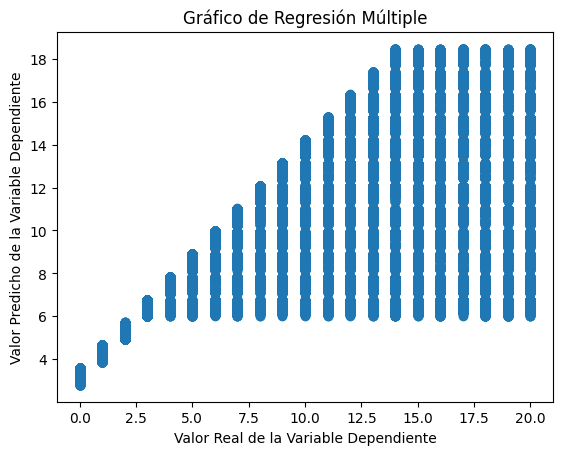

In [ ]:
import matplotlib.pyplot as plt

# Encuentra la combinación con el coeficiente de determinación más alto
mejor_combinacion = max(resultados, key=lambda x: resultados[x]['R^2'])

# Variables independientes para la mejor combinación
mejores_vars_indep = df[list(mejor_combinacion)]

# Inicializa el modelo de regresión lineal
model_mejor = LinearRegression()

# Ajusta el modelo con las variables de la mejor combinación
model_mejor.fit(X=mejores_vars_indep, y=Var_dep)

# Predice los valores de la variable dependiente
predicciones = model_mejor.predict(mejores_vars_indep)

# Crea un gráfico de dispersión para visualizar el modelo
plt.scatter(Var_dep, predicciones)
plt.xlabel("Valor Real de la Variable Dependiente")
plt.ylabel("Valor Predicho de la Variable Dependiente")
plt.title("Gráfico de Regresión Múltiple")
plt.show()


Creación de modelo usando CURRENT_JOB_YRS como variable dependiente.

In [ ]:
# Importa las bibliotecas necesarias
import numpy as np
from sklearn.linear_model import LinearRegression
import itertools  # Importa el módulo itertools

# Selecciona las variables numéricas
numericas = df[['Income', 'Age', 'Experience','Risk_Flag' , 'CURRENT_HOUSE_YRS']]

# Declara la variable dependiente
Var_dep = df['CURRENT_JOB_YRS']

# Inicializa un diccionario para almacenar los resultados
resultados = {}

# Bucle para calcular R^2 y R para cada combinación de dos variables independientes y una variable dependiente
for combo in itertools.combinations(numericas.columns, 5):
    # Variables independientes para esta combinación
    Vars_Indep = df[list(combo)]

    # Inicializa el modelo de regresión lineal
    model = LinearRegression()

    # Ajusta el modelo con las variables declaradas
    model.fit(X=Vars_Indep, y=Var_dep)

    # Calcula el coeficiente de determinación (R^2)
    coef_deter = model.score(X=Vars_Indep, y=Var_dep)

    # Calcula el coeficiente de correlación (R)
    coef_Correl = np.sqrt(coef_deter)

    # Almacena los resultados en el diccionario
    resultados[combo] = {'R^2': coef_deter, 'R': coef_Correl}

# Imprime los resultados
for combo, valores in resultados.items():
    print(f"Variables Independientes: {combo}, Coeficiente de Determinación (R^2): {valores['R^2']}, Coeficiente de Correlación (R): {valores['R']}")

Variables Independientes: ('Income', 'Age', 'Experience', 'Risk_Flag', 'CURRENT_HOUSE_YRS'), Coeficiente de Determinación (R^2): 0.41753751840360886, Coeficiente de Correlación (R): 0.6461714311261438


Creación de modelo usando CURRENT_HOUSE_YRS como variable dependiente.

In [ ]:
# Importa las bibliotecas necesarias
import numpy as np
from sklearn.linear_model import LinearRegression
import itertools  # Importa el módulo itertools

# Selecciona las variables numéricas
numericas = df[['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'Risk_Flag']]

# Declara la variable dependiente
Var_dep = df['CURRENT_HOUSE_YRS']

# Inicializa un diccionario para almacenar los resultados
resultados = {}

# Bucle para calcular R^2 y R para cada combinación de dos variables independientes y una variable dependiente
for combo in itertools.combinations(numericas.columns, 5):
    # Variables independientes para esta combinación
    Vars_Indep = df[list(combo)]

    # Inicializa el modelo de regresión lineal
    model = LinearRegression()

    # Ajusta el modelo con las variables declaradas
    model.fit(X=Vars_Indep, y=Var_dep)

    # Calcula el coeficiente de determinación (R^2)
    coef_deter = model.score(X=Vars_Indep, y=Var_dep)

    # Calcula el coeficiente de correlación (R)
    coef_Correl = np.sqrt(coef_deter)

    # Almacena los resultados en el diccionario
    resultados[combo] = {'R^2': coef_deter, 'R': coef_Correl}

# Imprime los resultados
for combo, valores in resultados.items():
    print(f"Variables Independientes: {combo}, Coeficiente de Determinación (R^2): {valores['R^2']}, Coeficiente de Correlación (R): {valores['R']}")

Variables Independientes: ('Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'Risk_Flag'), Coeficiente de Determinación (R^2): 0.0008855691515359254, Coeficiente de Correlación (R): 0.02975851393359429


##Graficación
Graficación con Risk_Flag como variable dependiente.

In [ ]:
# Selecciona las variables numéricas
Vars_Indep = df[['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']]

# Declara la variable dependiente
Var_dep = df['Risk_Flag']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
model.fit(X=Vars_Indep, y=Var_dep)

LinearRegression()

In [ ]:
model.score(Vars_Indep,Var_dep)

0.0017448954344837508

In [ ]:
#Predecimos los valores del total de accidentes a partir de la variable dependiente
y_pred = model.predict(X = df[['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']])
y_pred

array([0.14755186, 0.12779993, 0.1299873 , ..., 0.13220977, 0.14353387,
       0.09938137])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones_Risk_Flag', y_pred)

In [ ]:
df

,Predicciones_Risk_Flag,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,0.147552,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,0.127800,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,0.129987,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,0.140632,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,0.117255,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,0.119114,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,0.134709,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,0.132210,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,0.143534,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


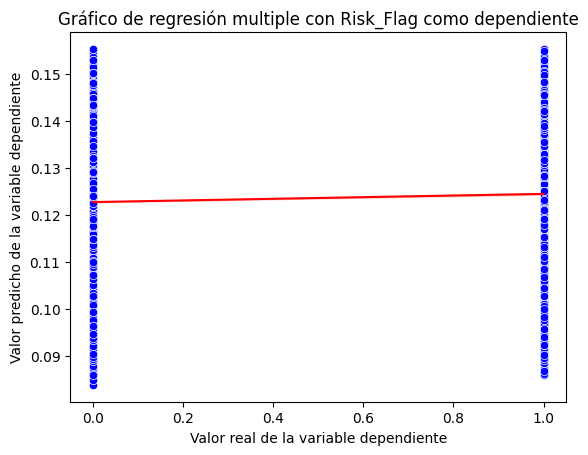

In [ ]:
#Imprimimos el scatter plot entre la variable dependiente y las independientes
#para observar el comportamiento en su dispersión
from turtle import color

sns.scatterplot(x = 'Risk_Flag', y = 'Predicciones_Risk_Flag', color = 'blue', data = df)
sns.lineplot(x = 'Risk_Flag', y = 'Predicciones_Risk_Flag', color = 'red', data = df)
plt.title('Gráfico de regresión multiple con Risk_Flag como dependiente')
plt.xlabel('Valor real de la variable dependiente')
plt.ylabel('Valor predicho de la variable dependiente')
plt.show()

Graficación con Income como variable dependiente.

In [ ]:
# Selecciona las variables numéricas
Vars_Indep = df[['Risk_Flag','CURRENT_HOUSE_YRS','CURRENT_JOB_YRS','Experience','Age']]

# Declara la variable dependiente
Var_dep = df['Income']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
model.fit(X=Vars_Indep, y=Var_dep)

LinearRegression()

In [ ]:
model.score(Vars_Indep,Var_dep)

7.086061455907622e-05

In [ ]:
#Predecimos los valores del total de accidentes a partir de la variable dependiente
y_pred = model.predict(X = df[['Risk_Flag','CURRENT_HOUSE_YRS','CURRENT_JOB_YRS','Experience','Age']])
y_pred

array([4974802.13806418, 5006717.88003873, 4990141.59994593, ...,
       4998718.94307829, 4971134.5248528 , 5015896.34614953])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones_Income', y_pred)

In [ ]:
df

,Predicciones_Income,Predicciones_Risk_Flag,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,4.974802e+06,0.147552,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,5.006718e+06,0.127800,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,4.990142e+06,0.129987,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4.946547e+06,0.140632,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,4.952970e+06,0.117255,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,5.009440e+06,0.119114,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,5.007117e+06,0.134709,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,4.998719e+06,0.132210,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,4.971135e+06,0.143534,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


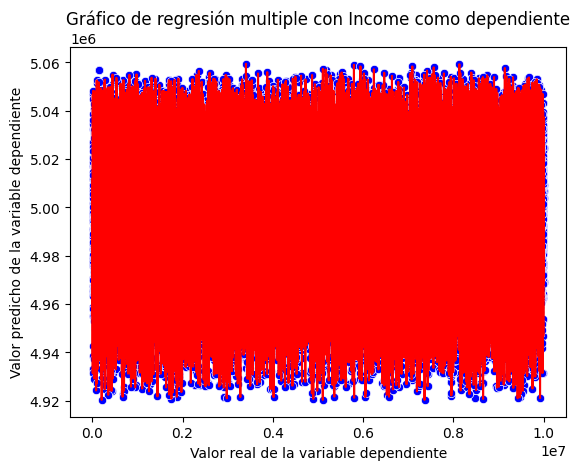

In [ ]:
#Imprimimos el scatter plot entre la variable dependiente y las independientes
#para observar el comportamiento en su dispersión
from turtle import color

sns.scatterplot(x = 'Income', y = 'Predicciones_Income', color = 'blue', data = df)
sns.lineplot(x = 'Income', y = 'Predicciones_Income', color = 'red', data = df)
plt.title('Gráfico de regresión multiple con Income como dependiente')
plt.xlabel('Valor real de la variable dependiente')
plt.ylabel('Valor predicho de la variable dependiente')
plt.show()

Graficación con Age como variable dependiente.

In [ ]:
# Selecciona las variables numéricas
Vars_Indep = df[['Income', 'Risk_Flag', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']]

# Declara la variable dependiente
Var_dep = df['Age']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
model.fit(X=Vars_Indep, y=Var_dep)

LinearRegression()

In [ ]:
model.score(Vars_Indep,Var_dep)

0.0009016476659865491

In [ ]:
#Predecimos los valores del total de accidentes a partir de la variable dependiente
y_pred = model.predict(X = df[['Income', 'Risk_Flag', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']])
y_pred

array([49.8820715 , 49.89838223, 50.61745948, ..., 50.15215512,
       50.56710831, 50.24522988])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones_Age', y_pred)

In [ ]:
df

,Predicciones_Age,Predicciones_Income,Predicciones_Risk_Flag,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,49.882071,4.974802e+06,0.147552,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,49.898382,5.006718e+06,0.127800,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,50.617459,4.990142e+06,0.129987,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,48.953852,4.946547e+06,0.140632,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,48.368124,4.952970e+06,0.117255,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,50.279343,5.009440e+06,0.119114,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,50.343300,5.007117e+06,0.134709,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,50.152155,4.998719e+06,0.132210,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,50.567108,4.971135e+06,0.143534,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


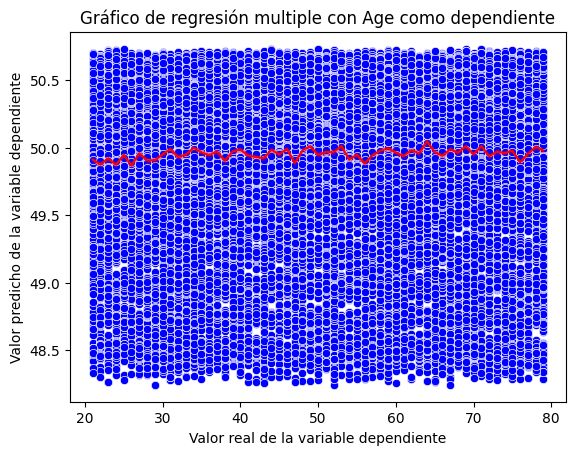

In [ ]:
#Imprimimos el scatter plot entre la variable dependiente y las independientes
#para observar el comportamiento en su dispersión
from turtle import color

sns.scatterplot(x = 'Age', y = 'Predicciones_Age', color = 'blue', data = df)
sns.lineplot(x = 'Age', y = 'Predicciones_Age', color = 'red', data = df)
plt.title('Gráfico de regresión multiple con Age como dependiente')
plt.xlabel('Valor real de la variable dependiente')
plt.ylabel('Valor predicho de la variable dependiente')
plt.show()

Graficación con Experience como variable dependiente.

In [ ]:
# Selecciona las variables numéricas
Vars_Indep = df[['Income', 'Age', 'Risk_Flag', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']]

# Declara la variable dependiente
Var_dep = df['Experience']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
model.fit(X=Vars_Indep, y=Var_dep)

LinearRegression()

In [ ]:
model.score(Vars_Indep,Var_dep)

0.41825638424757683

In [ ]:
#Predecimos los valores del total de accidentes a partir de la variable dependiente
y_pred = model.predict(X = df[['Income', 'Age', 'Risk_Flag', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']])
y_pred

array([ 6.67384834, 13.05721145,  7.50388267, ..., 10.84732823,
        3.28315318, 10.77459718])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones_Experience', y_pred)

In [ ]:
df

,Predicciones_Experience,Predicciones_Age,Predicciones_Income,Predicciones_Risk_Flag,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,6.673848,49.882071,4.974802e+06,0.147552,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,13.057211,49.898382,5.006718e+06,0.127800,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,7.503883,50.617459,4.990142e+06,0.129987,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,5.115027,48.953852,4.946547e+06,0.140632,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,6.304652,48.368124,4.952970e+06,0.117255,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,9.734201,50.279343,5.009440e+06,0.119114,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,9.730037,50.343300,5.007117e+06,0.134709,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,10.847328,50.152155,4.998719e+06,0.132210,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,3.283153,50.567108,4.971135e+06,0.143534,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


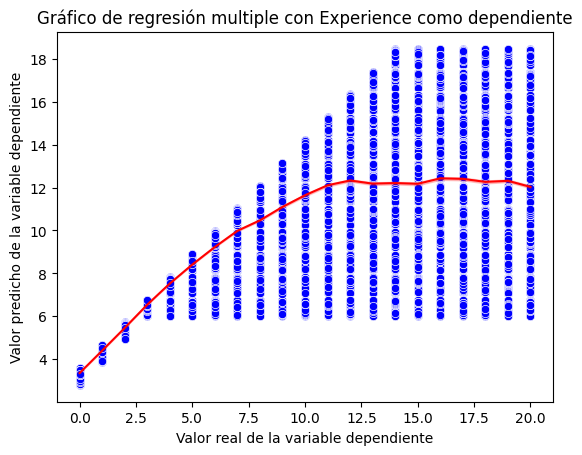

In [ ]:
#Imprimimos el scatter plot entre la variable dependiente y las independientes
#para observar el comportamiento en su dispersión
from turtle import color

sns.scatterplot(x = 'Experience', y = 'Predicciones_Experience', color = 'blue', data = df)
sns.lineplot(x = 'Experience', y = 'Predicciones_Experience', color = 'red', data = df)
plt.title('Gráfico de regresión multiple con Experience como dependiente')
plt.xlabel('Valor real de la variable dependiente')
plt.ylabel('Valor predicho de la variable dependiente')
plt.show()

Graficación con CURRENT_JOB_YRS como variable dependiente.

In [ ]:
# Selecciona las variables numéricas
Vars_Indep = df[['Income', 'Age', 'Experience','Risk_Flag' , 'CURRENT_HOUSE_YRS']]

# Declara la variable dependiente
Var_dep = df['CURRENT_JOB_YRS']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
model.fit(X=Vars_Indep, y=Var_dep)

LinearRegression()

In [ ]:
model.score(Vars_Indep,Var_dep)

0.41753751840360886

In [ ]:
#Predecimos los valores del total de accidentes a partir de la variable dependiente
y_pred = model.predict(X = df[['Income', 'Age', 'Experience','Risk_Flag' , 'CURRENT_HOUSE_YRS']])
y_pred

array([3.49577903, 6.27835624, 3.97953751, ..., 5.11089765, 2.40497943,
       9.08795759])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones_CURRENT_JOB_YRS', y_pred)

In [ ]:
df

,Predicciones_CURRENT_JOB_YRS,Predicciones_Experience,Predicciones_Age,Predicciones_Income,Predicciones_Risk_Flag,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,3.495779,6.673848,49.882071,4.974802e+06,0.147552,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,6.278356,13.057211,49.898382,5.006718e+06,0.127800,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3.979538,7.503883,50.617459,4.990142e+06,0.129987,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,3.210619,5.115027,48.953852,4.946547e+06,0.140632,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,6.710566,6.304652,48.368124,4.952970e+06,0.117255,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,7.497152,9.734201,50.279343,5.009440e+06,0.119114,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,6.289064,9.730037,50.343300,5.007117e+06,0.134709,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,5.110898,10.847328,50.152155,4.998719e+06,0.132210,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,2.404979,3.283153,50.567108,4.971135e+06,0.143534,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


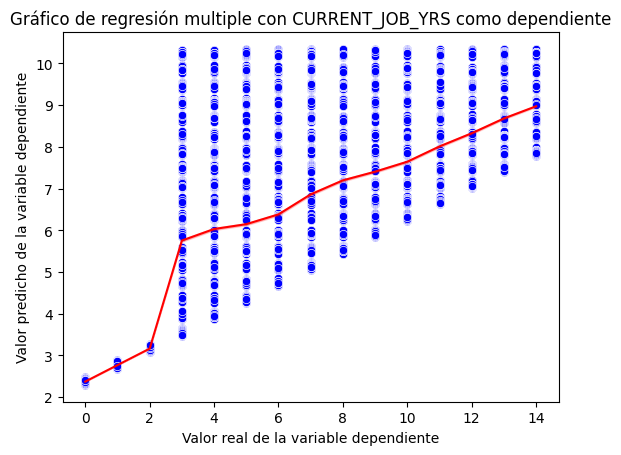

In [ ]:
#Imprimimos el scatter plot entre la variable dependiente y las independientes
#para observar el comportamiento en su dispersión
from turtle import color

sns.scatterplot(x = 'CURRENT_JOB_YRS', y = 'Predicciones_CURRENT_JOB_YRS', color = 'blue', data = df)
sns.lineplot(x = 'CURRENT_JOB_YRS', y = 'Predicciones_CURRENT_JOB_YRS', color = 'red', data = df)
plt.title('Gráfico de regresión multiple con CURRENT_JOB_YRS como dependiente')
plt.xlabel('Valor real de la variable dependiente')
plt.ylabel('Valor predicho de la variable dependiente')
plt.show()

Graficación con CURRENT_HOUSE_YRS como variable dependiente.

In [ ]:
# Selecciona las variables numéricas
Vars_Indep = df[['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'Risk_Flag']]

# Declara la variable dependiente
Var_dep = df['CURRENT_HOUSE_YRS']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
model.fit(X=Vars_Indep, y=Var_dep)

LinearRegression()

In [ ]:
model.score(Vars_Indep,Var_dep)

0.0008855691515359254

In [ ]:
#Predecimos los valores del total de accidentes a partir de la variable dependiente
y_pred = model.predict(X = df[['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'Risk_Flag']])
y_pred

array([12.01993676, 12.00040614, 11.94720837, ..., 11.98461145,
       11.9722276 , 12.00216875])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones_CURRENT_HOUSE_YRS', y_pred)

In [ ]:
df

,Predicciones_CURRENT_HOUSE_YRS,Predicciones_CURRENT_JOB_YRS,Predicciones_Experience,Predicciones_Age,Predicciones_Income,Predicciones_Risk_Flag,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,12.019937,3.495779,6.673848,49.882071,4.974802e+06,0.147552,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,12.000406,6.278356,13.057211,49.898382,5.006718e+06,0.127800,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,11.947208,3.979538,7.503883,50.617459,4.990142e+06,0.129987,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,11.965016,3.210619,5.115027,48.953852,4.946547e+06,0.140632,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,12.007585,6.710566,6.304652,48.368124,4.952970e+06,0.117255,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,12.027436,7.497152,9.734201,50.279343,5.009440e+06,0.119114,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,12.043193,6.289064,9.730037,50.343300,5.007117e+06,0.134709,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,11.984611,5.110898,10.847328,50.152155,4.998719e+06,0.132210,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,11.972228,2.404979,3.283153,50.567108,4.971135e+06,0.143534,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


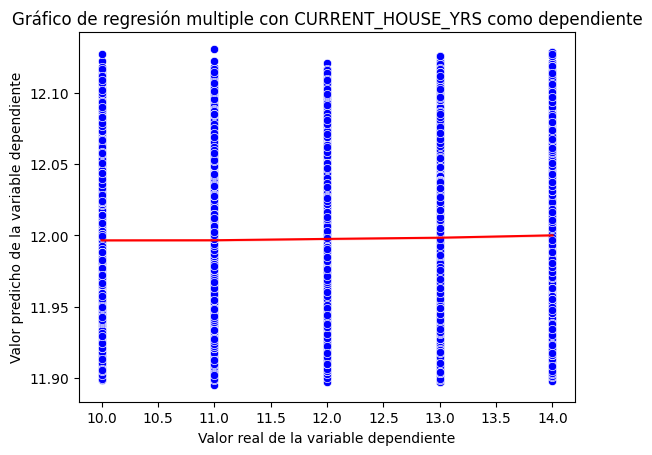

In [ ]:
#Imprimimos el scatter plot entre la variable dependiente y las independientes
#para observar el comportamiento en su dispersión
from turtle import color

sns.scatterplot(x = 'CURRENT_HOUSE_YRS', y = 'Predicciones_CURRENT_HOUSE_YRS', color = 'blue', data = df)
sns.lineplot(x = 'CURRENT_HOUSE_YRS', y = 'Predicciones_CURRENT_HOUSE_YRS', color = 'red', data = df)
plt.title('Gráfico de regresión multiple con CURRENT_HOUSE_YRS como dependiente')
plt.xlabel('Valor real de la variable dependiente')
plt.ylabel('Valor predicho de la variable dependiente')
plt.show()